C:\Users\BREND\AppData\Local\Temp\ipykernel_68576\2277284944.py:110: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  Demosaic_DEMO(imageio.imread(img))


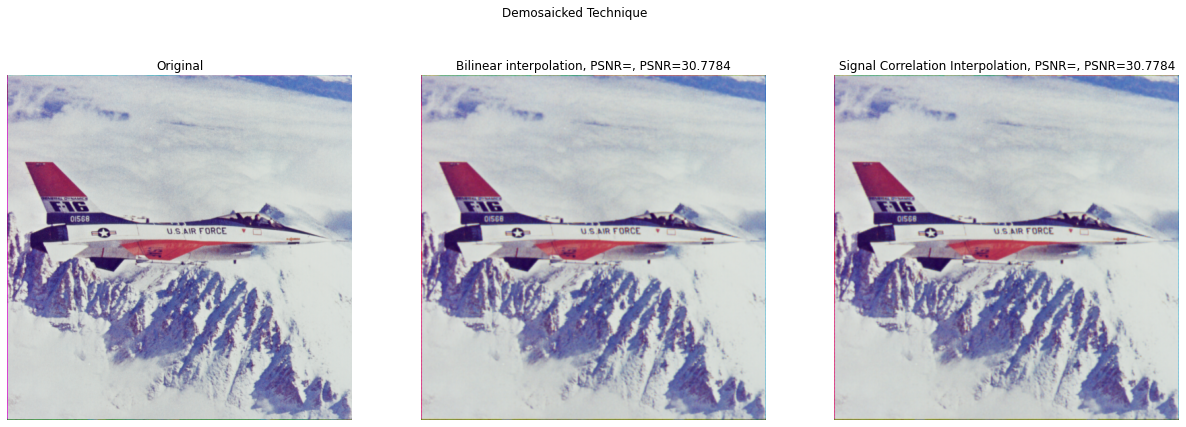

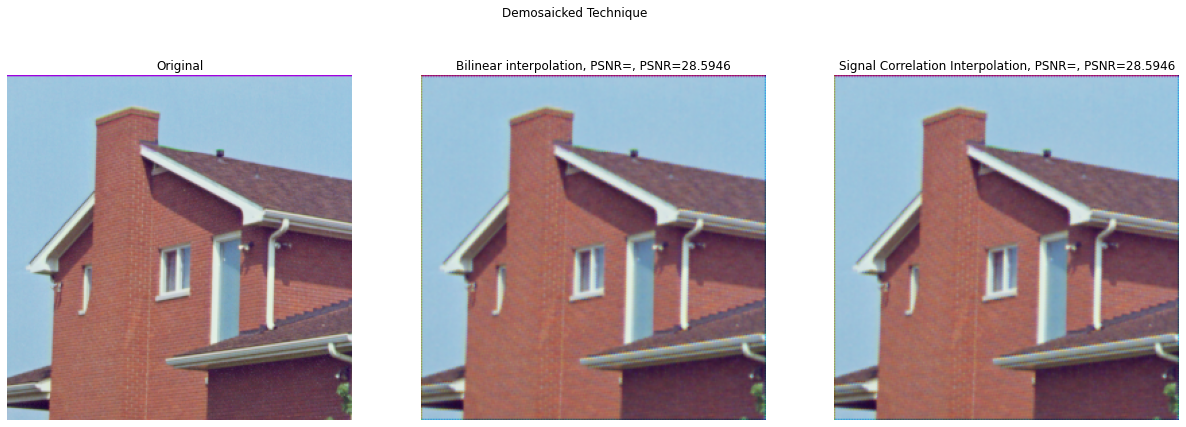

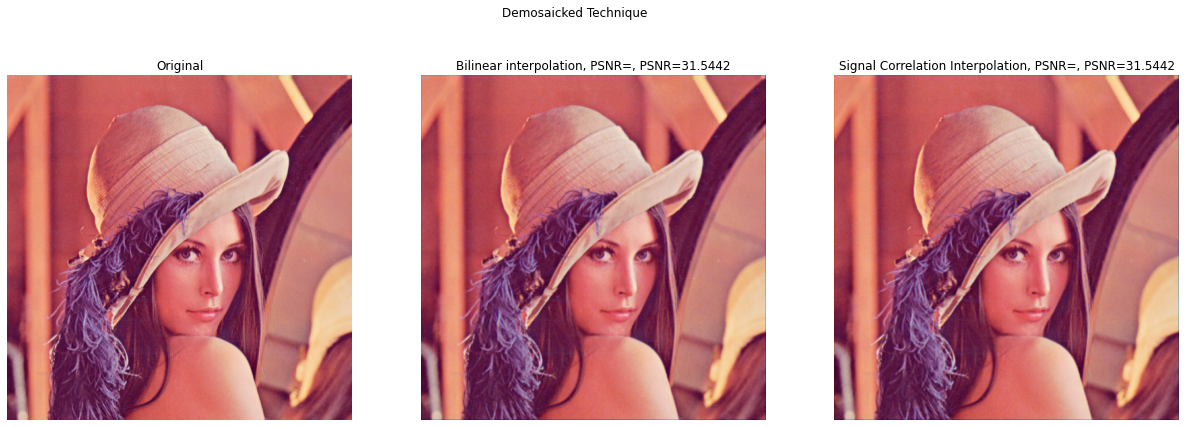

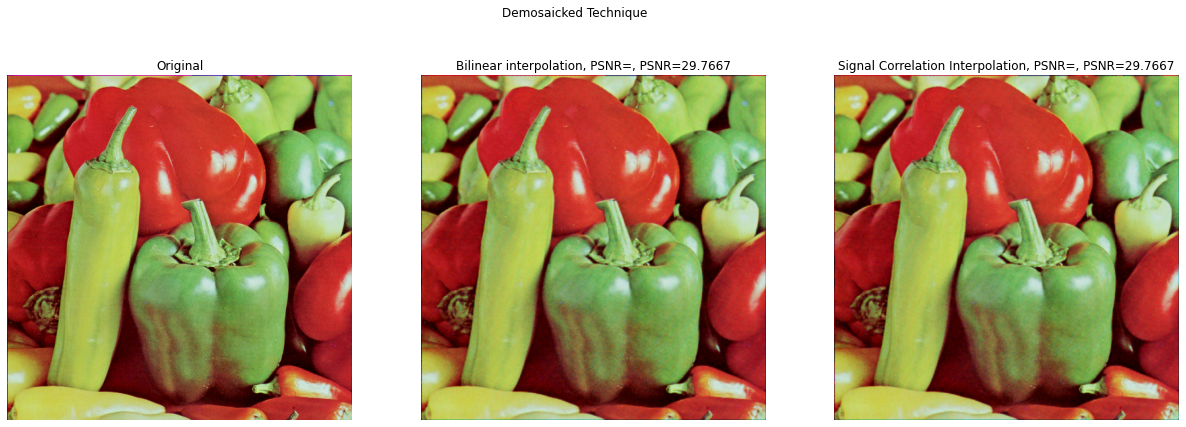

In [13]:
import numpy as np
import imageio
import random
import cv2
import matplotlib.pyplot as plt
from scipy.signal import correlate, convolve

## 雙線性內插演算法（Bilinear interpolation）
def rgb2cfa(RGB, pattern='RGGB'):
    height, width = RGB.shape[:2]
    
    _R = RGB[:, :, 0]
    _G = RGB[:, :, 1]
    _B = RGB[:, :, 2]

    bayer = np.array(list(pattern)).reshape(2, 2)
    bayerArray = np.tile(bayer, (height//2, width//2))

    cfa = np.zeros((height, width), dtype=np.uint8)
    cfa[bayerArray=='R'] = _R[bayerArray=='R']
    cfa[bayerArray=='G'] = _G[bayerArray=='G']
    cfa[bayerArray=='B'] = _B[bayerArray=='B']

    return cfa.astype(np.uint8)

## 雙線性內插演算法（Bilinear interpolation）, convolve(mode = 'same')可能導致PSNR降低
def demosaic_correlate(CFA, pattern='RGGB'):
    height, width = CFA.shape[:2]
    bayer = np.array(list(pattern)).reshape(2, 2)
    bayerArray = np.tile(bayer, (height//2, width//2))
    R_m, G_m, B_m = [bayerArray == c for c in ['R', 'G', 'B']]

    H_G = np.array([
        [0, 1, 0],
        [1, 4, 1],
        [0, 1, 0]
    ]) / 4
    H_RB = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]) / 4

    R = correlate(CFA*R_m, H_RB, mode='same')
    G = correlate(CFA*G_m, H_G, mode='same')
    B = correlate(CFA*B_m, H_RB, mode='same')

    R[bayerArray=='r']=CFA[bayerArray=='r']
    G[bayerArray=='g']=CFA[bayerArray=='g']
    B[bayerArray=='b']=CFA[bayerArray=='b']

    return np.dstack([R, G, B]).astype(np.uint8)

## 雙線性內插演算法（Bilinear interpolation）, convolve(mode = 'same')可能導致PSNR降低
def demosaic_convolve(CFA, pattern='RGGB'):
    height, width = CFA.shape[:2]
    bayer = np.array(list(pattern)).reshape(2, 2)
    bayerArray = np.tile(bayer, (height//2, width//2))
    R_m, G_m, B_m = [bayerArray == c for c in ['R', 'G', 'B']]

    H_G = np.array([
        [0, 1, 0],
        [1, 4, 1],
        [0, 1, 0]
    ]) / 4
    H_RB = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]) / 4

    R = convolve(CFA*R_m, H_RB, mode='same')
    G = convolve(CFA*G_m, H_G, mode='same')
    B = convolve(CFA*B_m, H_RB, mode='same')

    R[bayerArray=='r']=CFA[bayerArray=='r']
    G[bayerArray=='g']=CFA[bayerArray=='g']
    B[bayerArray=='b']=CFA[bayerArray=='b']

    return np.dstack([R, G, B]).astype(np.uint8)

def Demosaic_DEMO(image):
    cfa = rgb2cfa(image, pattern='RGGB')
    demosaicked_correlate_image = demosaic_correlate(cfa, pattern='RGGB')
    demosaicked_convolve_image = demosaic_convolve(cfa, pattern='RGGB')

    fig, axs = plt.subplots(1, 3, figsize=(21, 7))
    fig.suptitle("Demosaicked Technique")
    axs[0].imshow(image)
    axs[0].set_title("Original")
    axs[0].axis('off')
    axs[1].imshow(demosaicked_convolve_image)
    axs[1].set_title("Bilinear interpolation, PSNR=, PSNR={:.4f}".format(cv2.PSNR(image, demosaicked_convolve_image.astype('uint8'))))
    axs[1].axis('off')
    axs[2].imshow(demosaicked_correlate_image)
    axs[2].set_title("Signal Correlation Interpolation, PSNR=, PSNR={:.4f}".format(cv2.PSNR(image, demosaicked_correlate_image.astype('uint8'))))
    axs[2].axis('off')
    plt.show()


Image_Set = [
    "../../_Dataset/Basic/Jet.tiff",
    "../../_Dataset/Basic/4.1.05.tiff",
    "../../_Dataset/Basic/Lena.tiff",
    "../../_Dataset/Basic/Peppers.tiff",
]


for img in Image_Set:
    Demosaic_DEMO(imageio.imread(img))